### Import Libraries

In [20]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
from sklearn.model_selection import train_test_split   # For splitting data into train/test sets
from sklearn.linear_model import LogisticRegression     # For the logistic regression model
from sklearn.ensemble import RandomForestClassifier    # For the random forest model
from sklearn.metrics import accuracy_score              # To evaluate model performance

# Load the data
path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'
data = pd.read_pickle(path)

print(data.columns)

print(data['DistanceFromHome'].max())

# display(data.head())

# print(data['MonthlyIncome'].min())
# print(data['MonthlyIncome'].max())
# print(data['Age'].max())
# print(data['TotalWorkingYears'].min())
# print(data['JobSatisfaction'].max())

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Non-Travel', 'Travel_Frequently',
       'Travel_Rarely', 'Dept_Human Resources', 'Dept_Research & Development',
       'Dept_Sales', 'EduField_Human Resources', 'EduField_Life Sciences',
       'EduField_Marketing', 'EduField_Medical', 'EduField_Other',
       'EduField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
 

<>:9: SyntaxWarning: invalid escape sequence '\B'
<>:9: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sworn\AppData\Local\Temp\ipykernel_14532\3460784878.py:9: SyntaxWarning: invalid escape sequence '\B'
  path = 'D:\BIM\Summer Project\project\datasets\cleaned_ibm_dataset.pkl'


In [21]:
# Split the data into features and target
X = data.drop('Attrition', axis=1) # Input variables
y = data['Attrition'] # Variable to predict

# Oversampling the minority class
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
over = RandomOverSampler(random_state=42) # Create an instance of RandomOverSampler
X, y = over.fit_resample(X, y)
print(Counter(y))

Counter({0: 1215, 1: 235})
Counter({1: 1215, 0: 1215})


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1822, 53) (608, 53) (1822,) (608,)


In [23]:
# Create and train the logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Instance of the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f'\nModel accuracy: {accuracy:.2f}\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


Model accuracy: 0.98

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       319
           1       0.96      1.00      0.98       289

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608



[[306  13]
 [  0 289]]


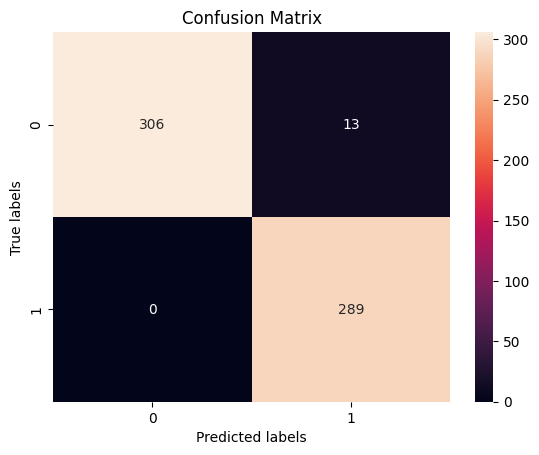

In [24]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.title('Confusion Matrix')
plt.show()

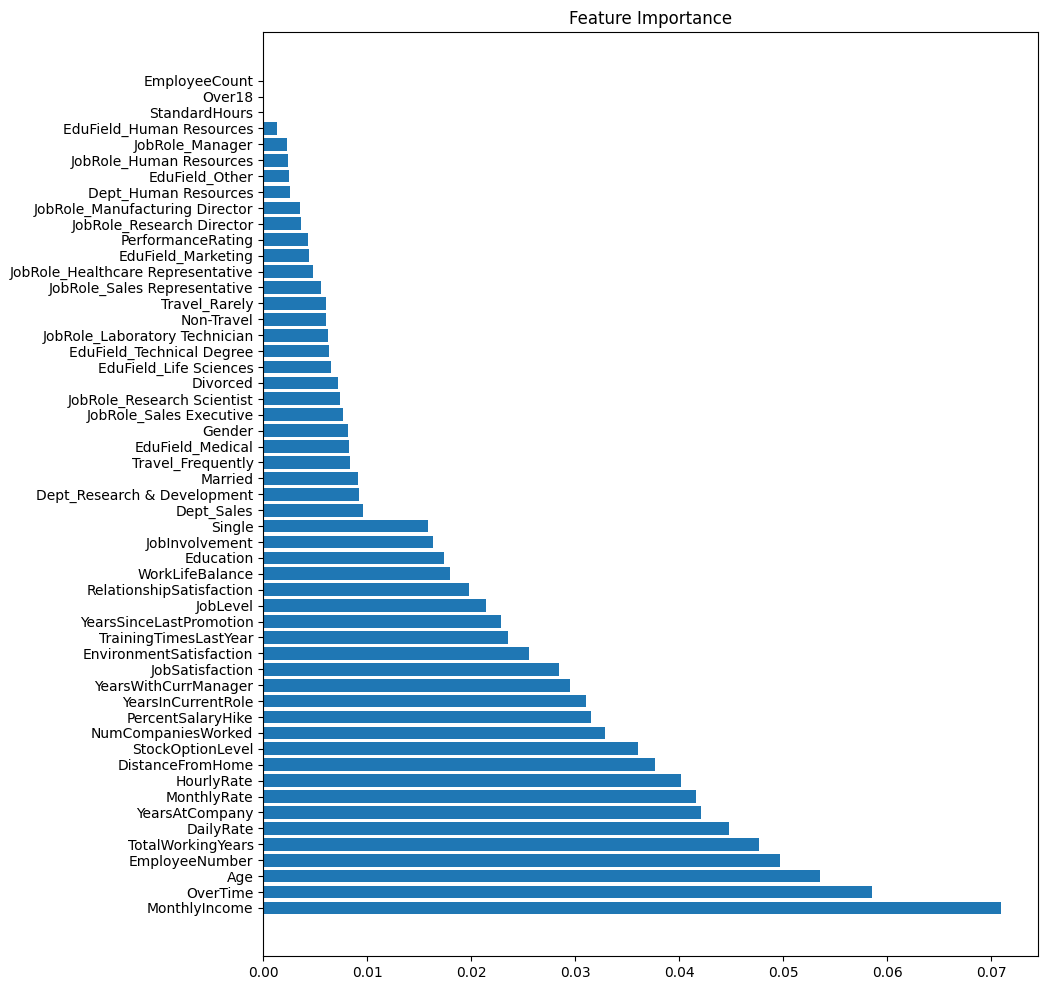

In [25]:
features = X.columns
importance = model.feature_importances_
indices =np.argsort(importance)[::-1]
names = [features[i] for i in indices]

# print("Feature ranking:")
# for i in range(X.shape[1]):
#     print(f"{i + 1}. {names[i]} ({importance[indices[i]]})")

plt.figure(figsize=(10, 12))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), labels=names)
plt.show()

In [26]:
# Save the model
import pickle

model_path = 'D:\\BIM\\Summer Project\\project\\models\\random-forest-model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump((model, X.columns.tolist()), file)